# Week 3 Assignment: Renters' Housing Burden in Sonoma County, CA

In this week's assignment I mapped the ACS data for "Median Gross Rent as a Percentage of Household Income in the last 12 months (Dollars)." 

Author: Lillian Liang

## Data Summary
This "Median Gross Rent as a Percentage of Household Income in the last 12 months (Dollars)" data fell under attribute B25071001 in Census Reporter. I attempted to plot the data at a block group scale for Sonoma County, CA for both 2019 (from Census Reporter) and 2015 (from NHGIS - IPUMS). I included the latter dataset because I struggled to use Census Reporter to get an older dataset. The latter dataset was in the form of a table (without geographies) so I attempted to join it to the geoJSON geometries from the 2019 dataset. 

## 2019 Data

First, I imported the libraries and the 2019 dataset:

In [21]:
# first, import the libraries

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# next, import the 2019 + JSON data
gdf_2019 = gpd.read_file('../Data/acs2019_5yr_B25071_15000US060971513081.geojson')

Next, I explored the dataset (similar to last week's HW) to figure out what each of the columns were and what I would be plotting. 

In [22]:
# find the shape of the dataset 
gdf_2019.shape

(388, 5)

In [23]:
# Note there are 387-341 = 46 null entries for the data
gdf_2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             388 non-null    object  
 1   name              388 non-null    object  
 2   B25071001         342 non-null    float64 
 3   B25071001, Error  303 non-null    float64 
 4   geometry          388 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 15.3+ KB


In [24]:
gdf_2019.head()

,geoid,name,B25071001,"B25071001, Error",geometry
0,05000US06097,"Sonoma County, CA",32.4,0.8,"MULTIPOLYGON (((-122.93506 38.31395, -122.9350..."
1,15000US060971501001,"Block Group 1, Sonoma, CA",29.1,11.8,"MULTIPOLYGON (((-122.46231 38.26304, -122.4623..."
2,15000US060971501002,"Block Group 2, Sonoma, CA",14.4,14.9,"MULTIPOLYGON (((-122.53116 38.23141, -122.5310..."
3,15000US060971501003,"Block Group 3, Sonoma, CA",23.4,29.2,"MULTIPOLYGON (((-122.45877 38.10383, -122.4586..."
4,15000US060971502021,"Block Group 1, Sonoma, CA",38.8,30.7,"MULTIPOLYGON (((-122.45893 38.29226, -122.4589..."


## Cleaning & Plotting the 2019 Data

I dropped the first row (total county data) and renamed the columns including the data to include the year (2019) so that I could differentiate it from the 2015 data.

In [25]:
# drop the row with index 0 (i.e. the first row)
gdf_2019 = gdf_2019.drop([0])

<AxesSubplot:>

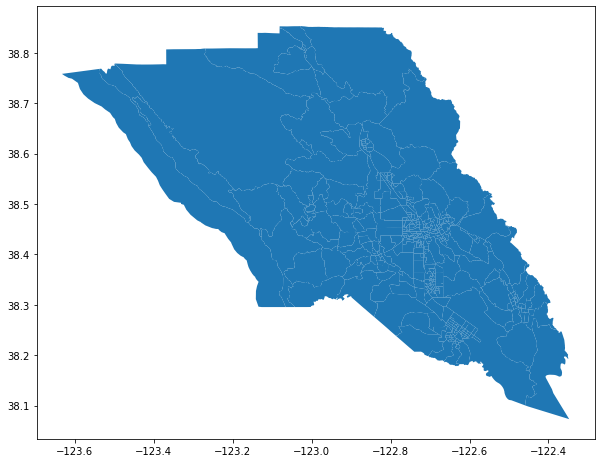

In [26]:
# plot it!
gdf_2019.plot(figsize=(10,10))

In [121]:
# renaming the columns
list(gdf_2019)

['geoid', 'name', '2019_B25071001', '2019_B25071001, Error', 'geometry']

In [28]:
gdf_2019.columns = ['geoid', 'name', '2019_B25071001', '2019_B25071001, Error', 'geometry']
gdf_2019.head()

,geoid,name,2019_B25071001,"2019_B25071001, Error",geometry
1,15000US060971501001,"Block Group 1, Sonoma, CA",29.1,11.8,"MULTIPOLYGON (((-122.46231 38.26304, -122.4623..."
2,15000US060971501002,"Block Group 2, Sonoma, CA",14.4,14.9,"MULTIPOLYGON (((-122.53116 38.23141, -122.5310..."
3,15000US060971501003,"Block Group 3, Sonoma, CA",23.4,29.2,"MULTIPOLYGON (((-122.45877 38.10383, -122.4586..."
4,15000US060971502021,"Block Group 1, Sonoma, CA",38.8,30.7,"MULTIPOLYGON (((-122.45893 38.29226, -122.4589..."
5,15000US060971502022,"Block Group 2, Sonoma, CA",28.4,6.5,"MULTIPOLYGON (((-122.47584 38.29376, -122.4758..."


Now that the data's clean, I can plot a histogram of the metrics and map it!

In [29]:
# get some stats
gdf_2019['2019_B25071001'].describe()

count    341.000000
mean      33.497361
std        9.702251
min        9.000000
25%       26.500000
50%       32.400000
75%       39.800000
max       51.000000
Name: 2019_B25071001, dtype: float64

Text(0.5, 0, 'Median Gross Rent as a Percentage of Household Income in the last 12 months (Dollars)')

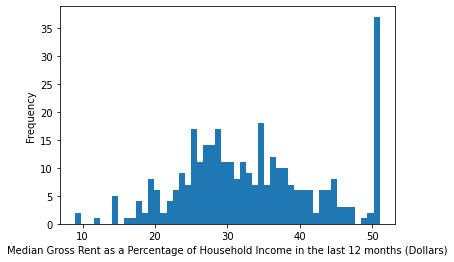

In [126]:
# plot it as a historgram with 50 bins  & label the axis
gdf_2019['2019_B25071001'].plot.hist(bins=50)

plt.xlabel('Median Gross Rent as a Percentage of Household Income in the last 12 months (Dollars)')

<AxesSubplot:>

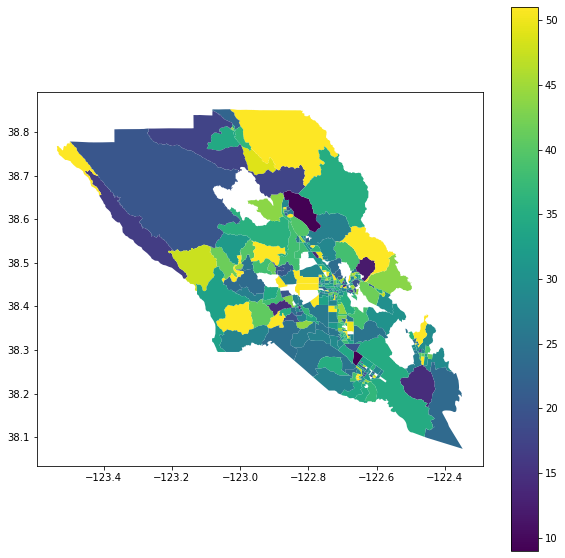

In [125]:
# plot it on a map
gdf_2019.plot(figsize=(10,10),column='2019_B25071001',legend=True)


__There are holes in this dataset__ - I am assuming those are the 46 null entries.

# 2nd Dataset - 2015 Data

I imported the 2015 data and checked it out, similarly to the 2019 data. As previously mentiond, I knew this dataset lacked geometries, so I couldn't map it without merging it with 2019 data.

In [76]:
# next, import the 2015 data
gdf_2015 = gpd.read_file('../Data/nhgis0001_ds215_20155_2015_blck_grp.csv')

In [77]:
gdf_2015.shape

(23212, 41)

I found it had a lot more columns than the previous one, and the data types were all 'object' rather than float! I looked up some of the column names in the associated '.txt' file to find the relevant columns.

In [78]:
gdf_2015.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23212 entries, 0 to 23211
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GISJOIN    23212 non-null  object  
 1   YEAR       23212 non-null  object  
 2   REGIONA    23212 non-null  object  
 3   DIVISIONA  23212 non-null  object  
 4   STATE      23212 non-null  object  
 5   STATEA     23212 non-null  object  
 6   COUNTY     23212 non-null  object  
 7   COUNTYA    23212 non-null  object  
 8   COUSUBA    23212 non-null  object  
 9   PLACEA     23212 non-null  object  
 10  TRACTA     23212 non-null  object  
 11  BLKGRPA    23212 non-null  object  
 12  CONCITA    23212 non-null  object  
 13  AIANHHA    23212 non-null  object  
 14  RES_ONLYA  23212 non-null  object  
 15  TRUSTA     23212 non-null  object  
 16  AITSCEA    23212 non-null  object  
 17  ANRCA      23212 non-null  object  
 18  CBSAA      23212 non-null  object  
 19  CSAA       23212 

In [38]:
list(gdf_2015)

['GISJOIN',
 'YEAR',
 'REGIONA',
 'DIVISIONA',
 'STATE',
 'STATEA',
 'COUNTY',
 'COUNTYA',
 'COUSUBA',
 'PLACEA',
 'TRACTA',
 'BLKGRPA',
 'CONCITA',
 'AIANHHA',
 'RES_ONLYA',
 'TRUSTA',
 'AITSCEA',
 'ANRCA',
 'CBSAA',
 'CSAA',
 'METDIVA',
 'NECTAA',
 'CNECTAA',
 'NECTADIVA',
 'UAA',
 'CDCURRA',
 'SLDUA',
 'SLDLA',
 'ZCTA5A',
 'SUBMCDA',
 'SDELMA',
 'SDSECA',
 'SDUNIA',
 'PUMA5A',
 'BTTRA',
 'BTBGA',
 'NAME_E',
 'ADRRE001',
 'NAME_M',
 'ADRRM001',
 'geometry']

In [39]:
gdf_2015.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,SDSECA,SDUNIA,PUMA5A,BTTRA,BTBGA,NAME_E,ADRRE001,NAME_M,ADRRM001,geometry
0,G06000104001001,2011-2015,,,California,06,Alameda County,001,,,...,,,,,,"Block Group 1, Census Tract 4001, Alameda Coun...",16.2,"Block Group 1, Census Tract 4001, Alameda Coun...",4.1,None
1,G06000104002001,2011-2015,,,California,06,Alameda County,001,,,...,,,,,,"Block Group 1, Census Tract 4002, Alameda Coun...",19.5,"Block Group 1, Census Tract 4002, Alameda Coun...",10.0,None
2,G06000104002002,2011-2015,,,California,06,Alameda County,001,,,...,,,,,,"Block Group 2, Census Tract 4002, Alameda Coun...",18.0,"Block Group 2, Census Tract 4002, Alameda Coun...",1.9,None
3,G06000104003001,2011-2015,,,California,06,Alameda County,001,,,...,,,,,,"Block Group 1, Census Tract 4003, Alameda Coun...",21.7,"Block Group 1, Census Tract 4003, Alameda Coun...",2.5,None
4,G06000104003002,2011-2015,,,California,06,Alameda County,001,,,...,,,,,,"Block Group 2, Census Tract 4003, Alameda Coun...",26.8,"Block Group 2, Census Tract 4003, Alameda Coun...",6.6,None


## Cleaning the 2015 Data

I reduced the columns and renamed a few to be similar to the 2019 dataset to reduce confusion. I also filtered the data for only block groups in Sonoma County.

In [80]:
# reduce the columns

columns_to_keep = ['GISJOIN',
                   'YEAR',
                   'REGIONA',
                   'DIVISIONA',
                   'STATE',
                   'STATEA',
                   'COUNTY',
                   'COUNTYA',
                   'TRACTA',
                   'NAME_E',
                   'ADRRE001',
                   'ADRRM001',
                   'geometry']

gdf_2015 = gdf_2015[columns_to_keep]

In [81]:
# rename the relevant columns
gdf_2015.columns=['geoid', # changed
 'YEAR',
 'REGIONA',
 'DIVISIONA',
 'STATE',
 'STATEA',
 'COUNTY',
 'COUNTYA',
 'TRACTA',
 'NAME_E',
 '2015_B25071001', # changed
 '2015_B25071001, Error', # changed
 'geometry']

gdf_2015.head()

,geoid,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,TRACTA,NAME_E,2015_B25071001,"2015_B25071001, Error",geometry
0,G06000104001001,2011-2015,,,California,06,Alameda County,001,400100,"Block Group 1, Census Tract 4001, Alameda Coun...",16.2,4.1,None
1,G06000104002001,2011-2015,,,California,06,Alameda County,001,400200,"Block Group 1, Census Tract 4002, Alameda Coun...",19.5,10.0,None
2,G06000104002002,2011-2015,,,California,06,Alameda County,001,400200,"Block Group 2, Census Tract 4002, Alameda Coun...",18.0,1.9,None
3,G06000104003001,2011-2015,,,California,06,Alameda County,001,400300,"Block Group 1, Census Tract 4003, Alameda Coun...",21.7,2.5,None
4,G06000104003002,2011-2015,,,California,06,Alameda County,001,400300,"Block Group 2, Census Tract 4003, Alameda Coun...",26.8,6.6,None


In [82]:
# filter the rows for Sonoma county only
gdf_2015 = gdf_2015[gdf_2015['COUNTYA']=='097']

# confirm that it has the same number of rows as the other dataset - yay!
gdf_2015.shape

(387, 13)

## Additionally clean the 2015 data to prepare for merge

I knew that I wanted to merge the data with the other 2019 data but that I needed a common 'attribute' by which to merge. So, I modified the 'geoid' column in the 2015 dataset to match that of the 2019 dataset.

In [90]:
# to match the geoid column in 'gdf_2019', write a function that replaces leading 'G' with '15000US'

# also noticed extra leading 0's in county code and tract code
def clean(initial):    
    cleaned = initial[1:3] + initial[4:7] + initial[8:] # remove the leading G and extra 0's
    cleaned = '15000US'+ cleaned
    return cleaned

# apply the function to the column
gdf_2015['geoid'] = gdf_2015['geoid'].apply(clean)

gdf_2015


,geoid,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,TRACTA,NAME_E,2015_B25071001,"2015_B25071001, Error",geometry,geoid_new
21480,15000US060971501001,2011-2015,,,California,06,Sonoma County,097,150100,"Block Group 1, Census Tract 1501, Sonoma Count...",50.0,,None,15000US060971501001
21481,15000US060971501002,2011-2015,,,California,06,Sonoma County,097,150100,"Block Group 2, Census Tract 1501, Sonoma Count...",20.9,11.4,None,15000US060971501002
21482,15000US060971501003,2011-2015,,,California,06,Sonoma County,097,150100,"Block Group 3, Census Tract 1501, Sonoma Count...",24.0,42.9,None,15000US060971501003
21483,15000US060971502021,2011-2015,,,California,06,Sonoma County,097,150202,"Block Group 1, Census Tract 1502.02, Sonoma Co...",36.6,21.4,None,15000US060971502021
21484,15000US060971502022,2011-2015,,,California,06,Sonoma County,097,150202,"Block Group 2, Census Tract 1502.02, Sonoma Co...",40.4,22.9,None,15000US060971502022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21862,15000US060971543032,2011-2015,,,California,06,Sonoma County,097,154303,"Block Group 2, Census Tract 1543.03, Sonoma Co...",33.8,18.4,None,15000US060971543032
21863,15000US060971543041,2011-2015,,,California,06,Sonoma County,097,154304,"Block Group 1, Census Tract 1543.04, Sonoma Co...",36.3,17.4,None,15000US060971543041
21864,15000US060971543042,2011-2015,,,California,06,Sonoma County,097,154304,"Block Group 2, Census Tract 1543.04, Sonoma Co...",30.0,24.8,None,15000US060971543042
21865,15000US060971543043,2011-2015,,,California,06,Sonoma County,097,154304,"Block Group 3, Census Tract 1543.04, Sonoma Co...",30.8,19.9,None,15000US060971543043


In [95]:
# further filter the dataset so that the merged dataset is minimal
# rename the relevant columns
columns_to_keep =['geoid',
 '2015_B25071001',
 '2015_B25071001, Error']
gdf_2015 = gdf_2015[columns_to_keep]

In [123]:
# the data is in string form rather than float, so we need to convert

gdf_2015['2015_B25071001'] = gdf_2015['2015_B25071001'].astype(float)
#gdf_2015.iloc[:,1] = gdf_2015.iloc[:,1].astype(float)

gdf_2015.dtypes

ValueError: could not convert string to float: ''

I struggled to figure out how to properly convert the string to a float in time to submit this assignment. It's a problem for next time!

## Use merge to join the datasets

I followed this documentation (https://geopandas.org/docs/user_guide/mergingdata.html) to merge the two datasets.

In [96]:
gdf_merged = gdf_2019.merge(gdf_2015, on='geoid')

In [97]:
gdf_merged.head()

,geoid,name,2019_B25071001,"2019_B25071001, Error",geometry,2015_B25071001,"2015_B25071001, Error"
0,15000US060971501001,"Block Group 1, Sonoma, CA",29.1,11.8,"MULTIPOLYGON (((-122.46231 38.26304, -122.4623...",50.0,
1,15000US060971501002,"Block Group 2, Sonoma, CA",14.4,14.9,"MULTIPOLYGON (((-122.53116 38.23141, -122.5310...",20.9,11.4
2,15000US060971501003,"Block Group 3, Sonoma, CA",23.4,29.2,"MULTIPOLYGON (((-122.45877 38.10383, -122.4586...",24.0,42.9
3,15000US060971502021,"Block Group 1, Sonoma, CA",38.8,30.7,"MULTIPOLYGON (((-122.45893 38.29226, -122.4589...",36.6,21.4
4,15000US060971502022,"Block Group 2, Sonoma, CA",28.4,6.5,"MULTIPOLYGON (((-122.47584 38.29376, -122.4758...",40.4,22.9


In exploring the shape of the new merged dataset, it looked like the merge was a success.

In [98]:
gdf_merged.shape

(387, 7)

In [99]:
gdf_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   geoid                  387 non-null    object  
 1   name                   387 non-null    object  
 2   2019_B25071001         341 non-null    float64 
 3   2019_B25071001, Error  302 non-null    float64 
 4   geometry               387 non-null    geometry
 5   2015_B25071001         387 non-null    object  
 6   2015_B25071001, Error  387 non-null    object  
dtypes: float64(2), geometry(1), object(4)
memory usage: 24.2+ KB


However, because the 2015 data was still an object/string, the data could not be graphed or plotted cleanly.

In [ ]:
# plot it as a historgram with 50 bins
gdf_merged['2015_B25071001'].describe()

In [118]:
# plot it as a historgram with 50 bins
gdf_merged['2015_B25071001'].plot.hist(bins=50)

TypeError: no numeric data to plot

<AxesSubplot:>

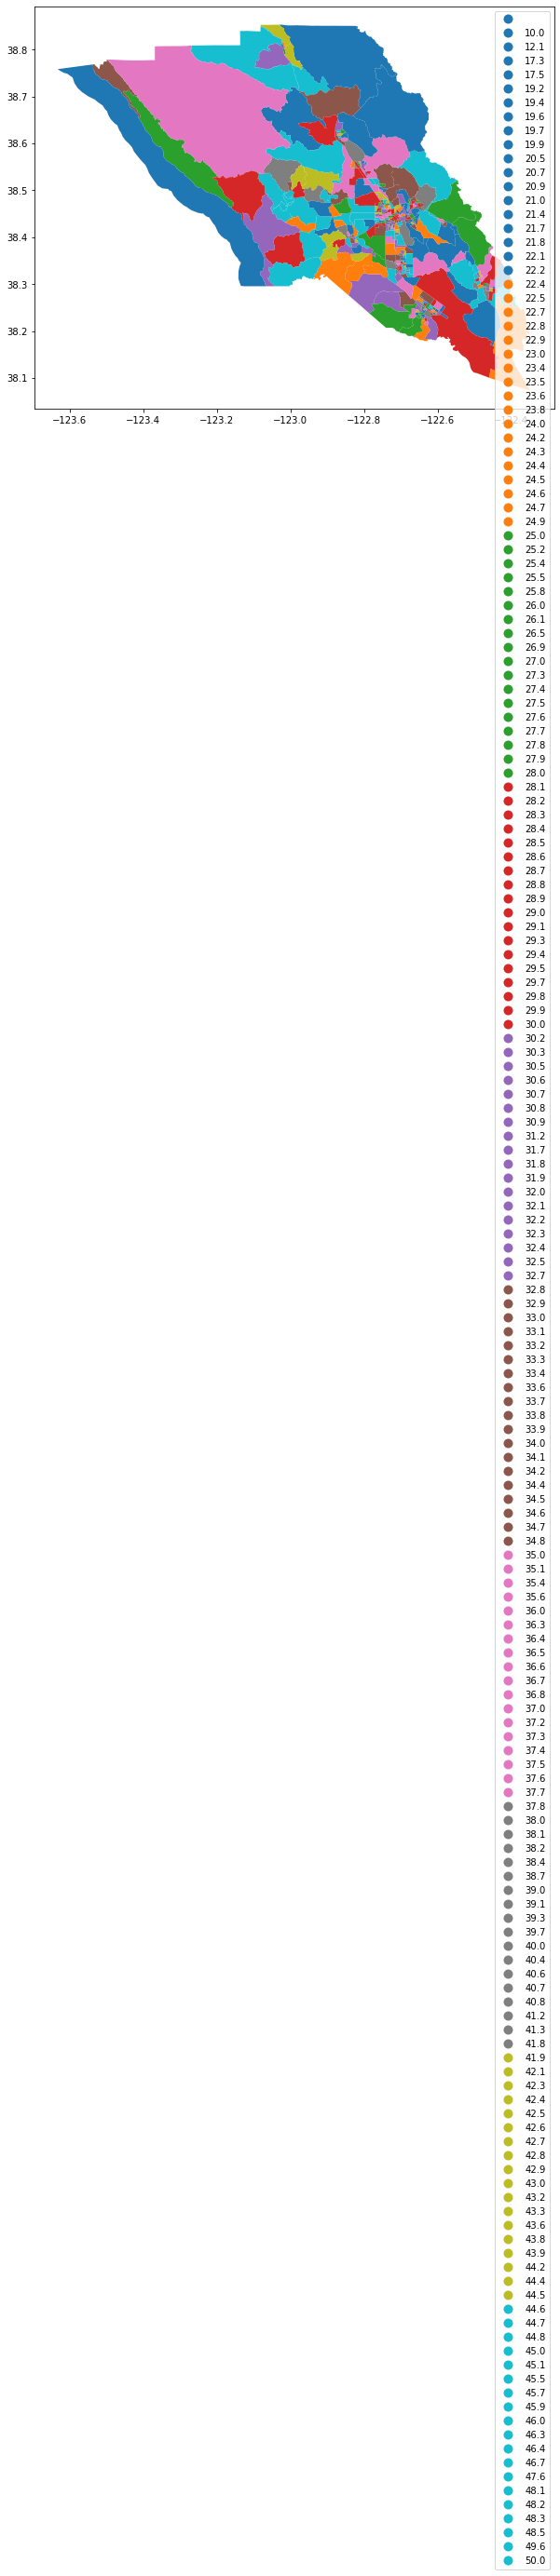

In [117]:
# plot it on a map
gdf_merged.plot(figsize=(10,10),column='2015_B25071001',legend=True)